In [1]:
# import the necessary packages 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

### dataset 
#### Columns 
* Pregnancies: Number of times pregnant
* GlucosePlasma: glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin2-Hour: serum insulin (mu U/ml)
* BMIBody: mass index (weight in kg/(height in m)^2)
* Diabetes: PedigreeFunctionDiabetes pedigree function
* AgeAge: (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [2]:
# loading the data 
col_names = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
pima = pd.read_csv("./data/raw/diabetes.csv", header=None, names=col_names, skiprows=1)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

In [5]:
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# split the data into featureset and target variables 
feature_cols = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age"]
target_cols = ["label"] 
X = pima[feature_cols]
y = pima[target_cols]

In [7]:
# split the data into training set and testing set 
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
# Create a decission tree classifier
clf = DecisionTreeClassifier()

# training decission tree classifier 
clf = clf.fit(trainX, trainY) 

# predict the response for test dataset 
predictions = clf.predict(testX) 
labels = ["0", "1"]
print("Accuracy:", metrics.accuracy_score(testY, predictions))


Accuracy: 0.7056277056277056


### Visualizing Decision Trees

In [9]:
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image 
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
               filled=True, rounded=True, 
               special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('./data/output/version1/diabetes.png')
Image(graph.create_png())

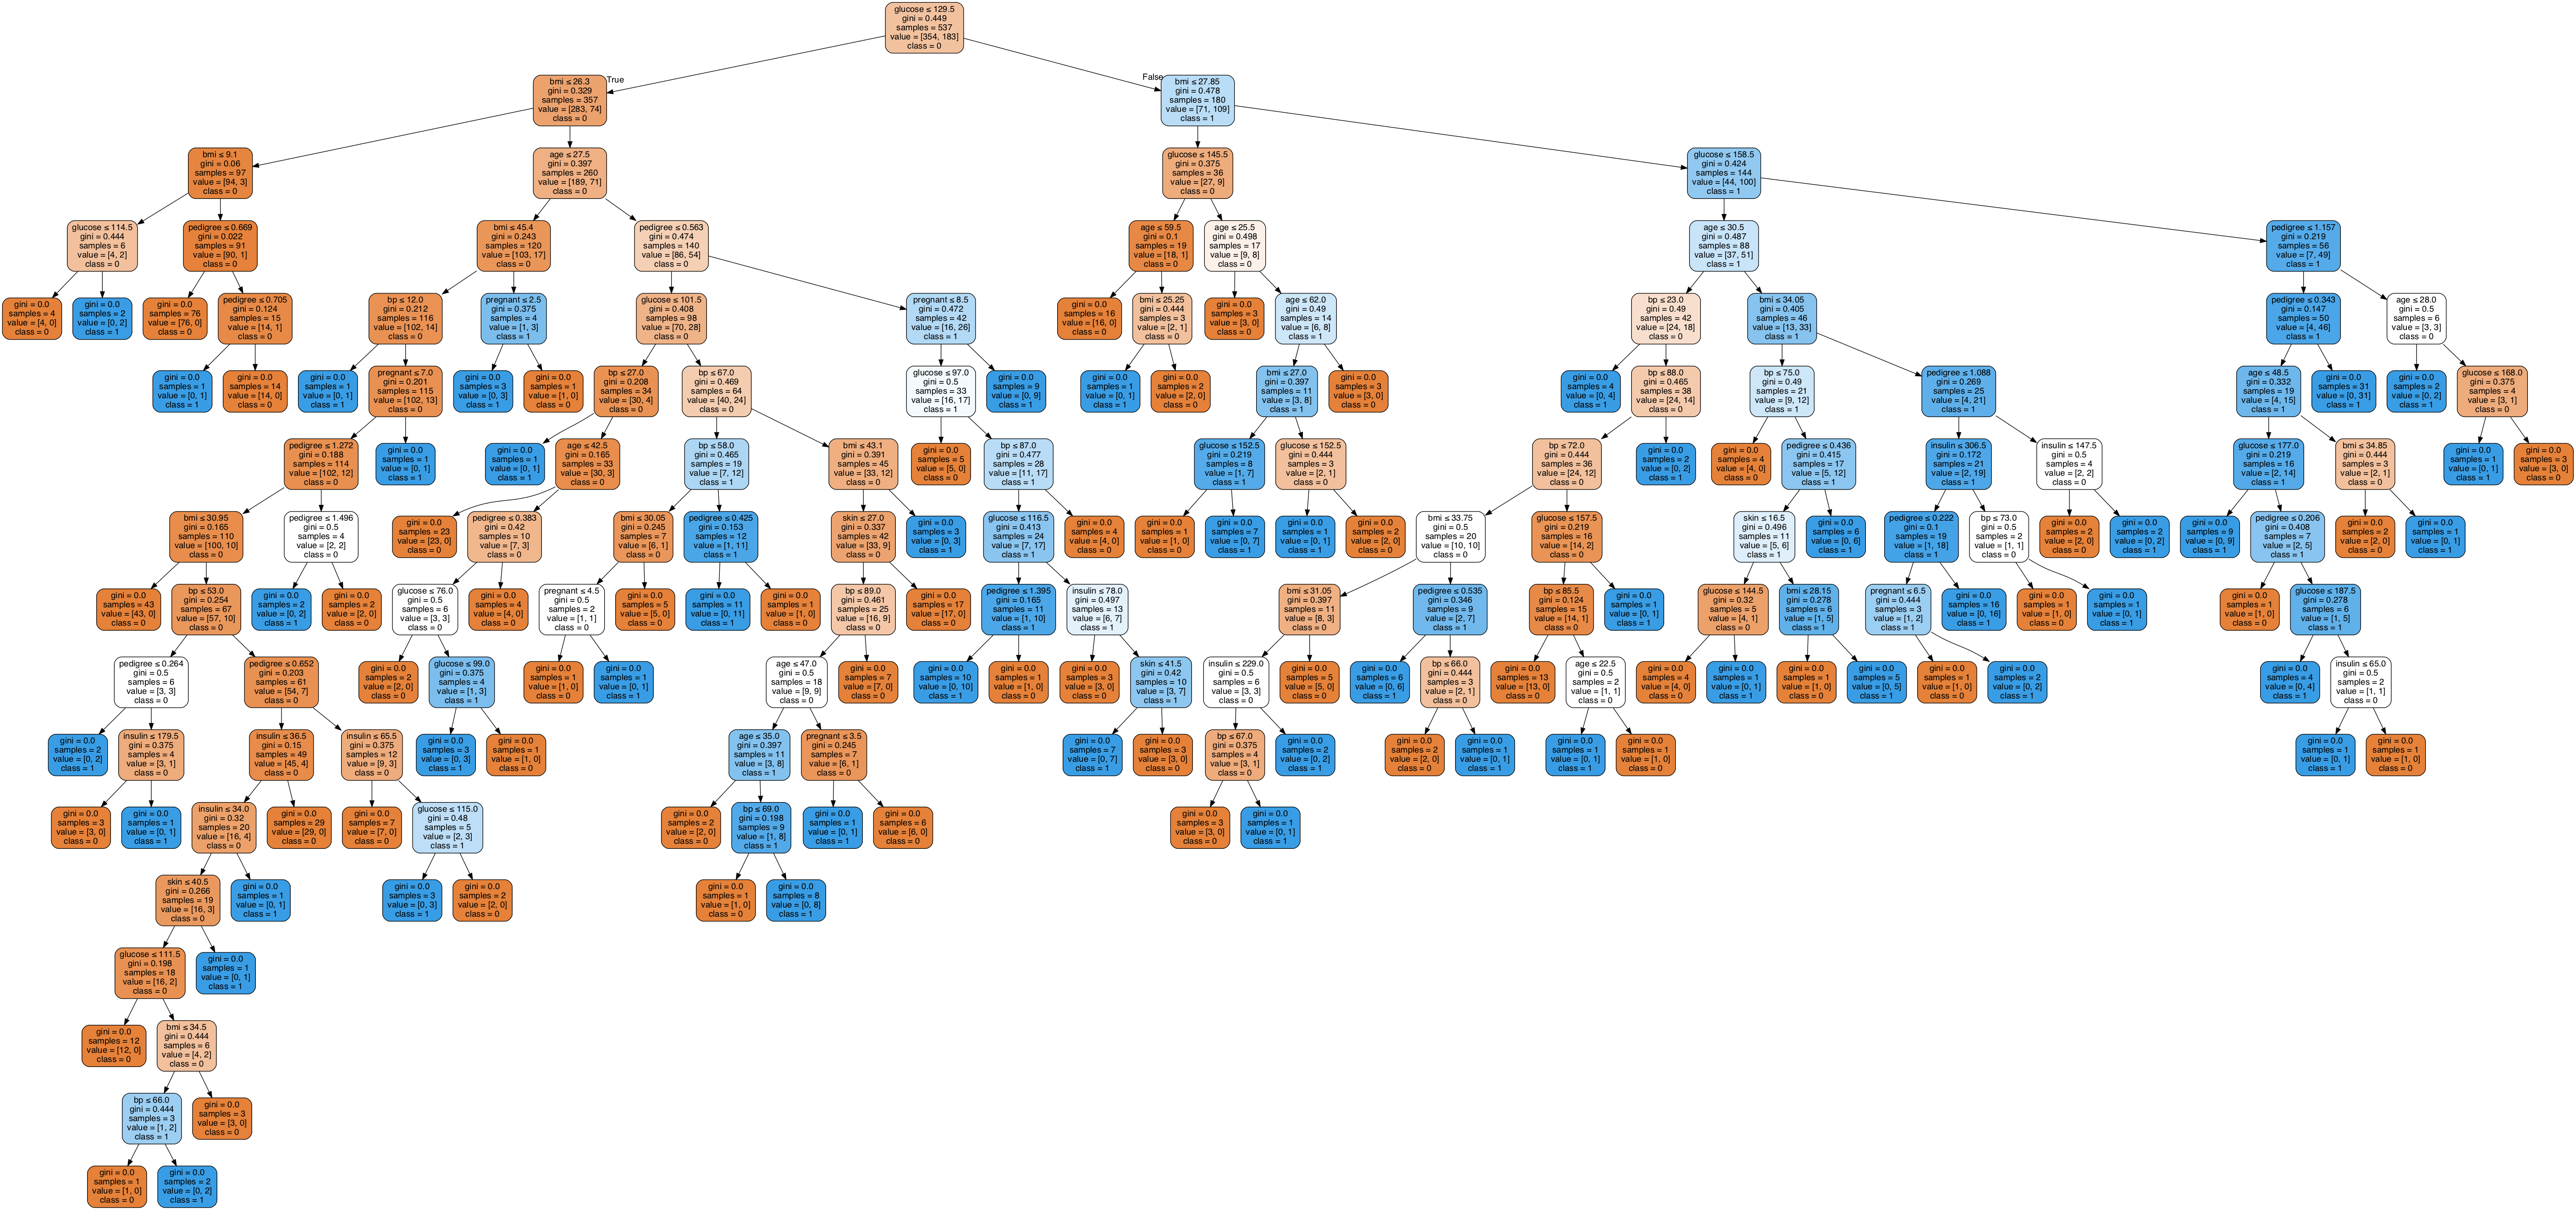

In [10]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('./data/output/version1/diabetes.png')
Image(graph.create_png())

Gini Ratio : Measures the impurity of a node (A node is pure when all of its records belong to the same class)
Sample size

### optimizing the decision tree performance

* **criterion: opetional (default="gini") or choose atribute selection measure:** This parameter allows us to use different attribute seleection measure. Supported criteria "gini" for Gini index "entropy" for information gain

* **spliter : string optional (default="best") or Split Strategy: This parameeter allows us to use Split Strategy:** This parameter allows us to use split strategy. Supported strategies are "best" to choose best split and "random" to choose best random split.

* **max_depth : int or None, optional(default=None) or Maximum Depth of a Tree:** The maximum depth of a tree. If None, then nodes are expanded untill all leaves contain less than min_samples_split samples.The higher value of maximum split causes overfitting, and a lower value causes underfitting [(source)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In scikit-learn optimization of decission tree classifier peerformed by only pre-pruning. Maximum deepth of tree can be used as a control variable for pre-pruning.  
Other than pre-pruning, other attributes such as selection measure (criterion) can be tuned and the results visualized

In [11]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(trainX, trainY)
predictions = clf.predict(testX)
print("Accuracy:", metrics.accuracy_score(testY, predictions))

Accuracy: 0.7705627705627706


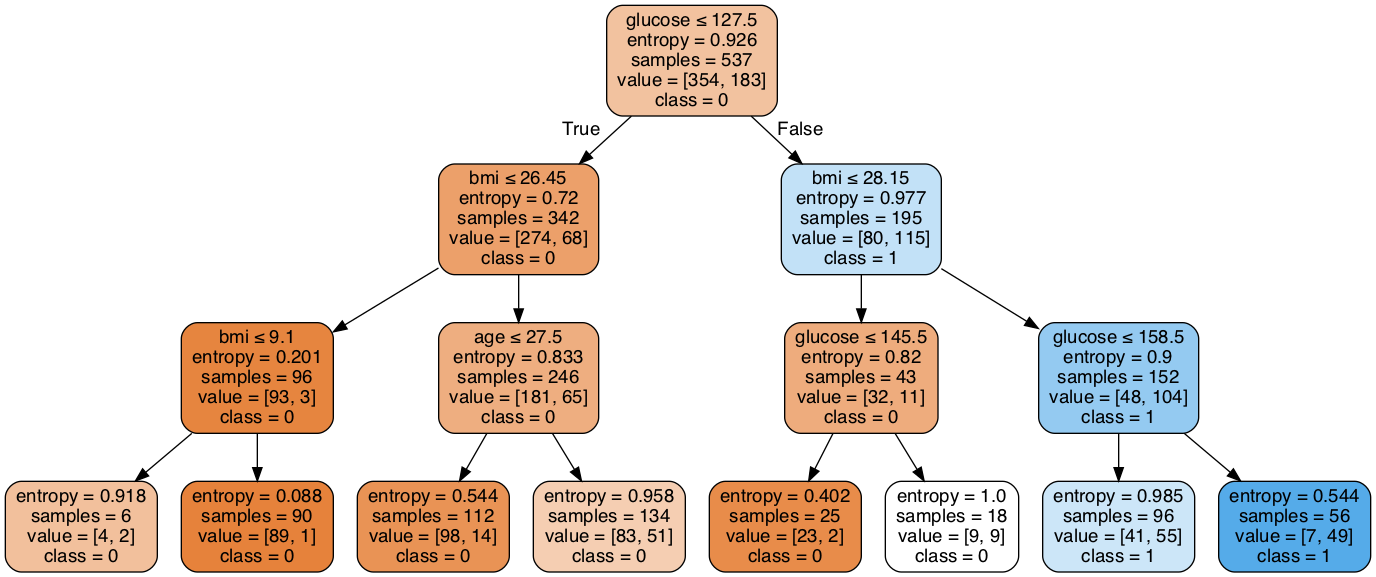

In [13]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
               filled=True, rounded=True, 
               special_characters=True, feature_names=feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('./data/output/version1/diabetes_entropy_dep3.png')
Image(graph.create_png())

### Pros/Cons
#### Pros
* Easy to interpret and visualize 
* Can easily capture Non-Linear paterns 
* It requires fewer data preprocessing from the user (eg: there is no need to normalize columns) 
* It can be used for predicting missing values, suitable for varoable selection 
* The decision tree has no assumption about distribution, because of the non-parametric nature of algorithm [(Source)](https://scikit-learn.org/stable/modules/tree.html) 
#### Cons
* Sensitive to noisy data. It can overfit noisy data. 
* The small variation(or variance) in data can result in differrent decision tree. This can be reduced by bagging and boosting algorithms. 
* Deecision Tree are biased with imbalanced dataset, so it is recomended to balance out the dataset before creating a decision tree